<div class="alert alert-block alert-info">
<ul>
<li>Course: Machine Learning</li>
<li>Project: 01</li>
<li>Team members</li>
<li>Mauro Travieso Pena</li>
<li>Quoc Huy Luong</li>
<li>Ngoc Bao Tran</li>
<ul>
</div>


## Exporatory Data Analysis


### Dataset reference: https://www.kaggle.com/CooperUnion/anime-recommendations-database?fbclid=IwAR3sXr48_xQHp8NgF9AyXuVf0RGwTkFw8bfkRoXda6zix9rQsevpya8JDOM#rating.csv


### Context
This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.


### Content

#### Anime.csv

**anime_id** - myanimelist.net's unique id identifying an anime.

**name** - full name of anime.

**genre** - comma separated list of genres for this anime.

**type** - movie, TV, OVA, etc.

**episodes** - how many episodes in this show. (1 if movie).

**rating** - average rating out of 10 for this anime.

**members** - number of community members that are in this anime's "group".

#### Rating.csv

**user_id** - non identifiable randomly generated user id.

**anime_id** - the anime that this user has rated.

**rating** - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).




<div class="alert alert-block alert-info">
Some comments here 
</div>



# Import Libraries 

In [ ]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import import_ipynb 
import functions as myLib




# Load data from files

In [ ]:
RawData = pd.read_csv('../data/anime.csv')
OriginData = RawData.copy()

<div class="alert alert-block alert-info">
Some comments here 
</div>

# Data Descriptive 

#### View sample data

In [ ]:
data_columns = RawData.columns
data_columns
RawData.sample(5)


#### Check null values

In [ ]:
RawData.isnull().sum()


#### Drop null rows

In [ ]:
RawData = RawData.dropna()


#### remove unknown data

In [ ]:
RawData.info()

In [ ]:
RawData['episodes'].describe()

In [ ]:
RawData['episodes'].unique()


<div class="alert alert-block alert-danger">
We saw that, there are some 'Unknow' values in the <b>episodes</b> feature.
Should we remove these rows from the dataset ?
Let's check.
</div>

#### Check and remove Unknown data from episodes


In [ ]:
episodes_unknown = RawData[['anime_id','episodes','rating']].copy() 
episodes_unknown.sample(5)


In [ ]:
episodes_unknown.loc[episodes_unknown['episodes'] !='Unknown', 'episodes'] = 1
episodes_unknown.loc[episodes_unknown['episodes'] =='Unknown', 'episodes'] = 0
episodes_unknown.head()


In [ ]:
plt.scatter(episodes_unknown['episodes'],episodes_unknown['rating'] , alpha=0.5)

In [ ]:
episodes_unknown['episodes'].describe()


<div class="alert alert-block alert-danger">
Based on the outputs of the <b>episodes</b> feature,
we saw that the unknow values (0) does not affect the range of the rating.
So we can remove known values in the <b>episodes</b> feature.  
</div>


#### Remove Unknown data from episodes


In [ ]:
RawData = RawData[RawData['episodes']!='Unknown']
RawData.head()



#### Check and remove outliers

<div class="alert alert-block alert-info">
Check and remove outliers  
</div>

##### Check the members feature

In [ ]:
RawData['members'].describe()


In [ ]:
plt.figure(figsize=(16, 6))
members_box = sns.boxplot(x="members", 
                data=RawData)

In [ ]:
RawData.members.hist(bins=10)
plt.title("Members Distribution")


##### Check the members feature

In [ ]:
RawData['episodes'] = RawData['episodes'].astype(int)


In [ ]:
RawData['episodes'].describe()


In [ ]:
RawData.episodes.hist(bins=10)
plt.title("episodes Distribution")

In [ ]:
plt.figure(figsize=(16, 6))
episodes_box = sns.boxplot(x="episodes", 
                data=RawData)


##### Scatter plots - Relationships between the numerical varibles.

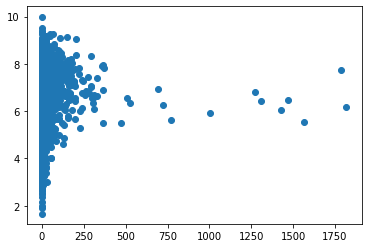

In [46]:
plt.scatter( RawData['episodes'], RawData['rating'], marker='o');


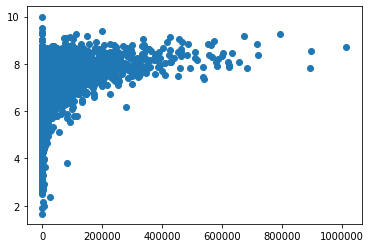

In [47]:
plt.scatter(RawData['members'], RawData['rating'],marker='o');



In [ ]:
RawData.rating.plot(kind="kde")
plt.title("Rating Distribution")

In [ ]:
RawData['rating'].describe()

In [ ]:
ax = sns.boxplot(x="rating", 
                data=RawData)


In [ ]:
#Add a new column rating class 
RawData['Class']=1#RawData['rating']
RawData.sample(5)

In [ ]:
# 1: High
# or 0: Low based on rating
RawData.loc[RawData['rating'] >= RawData['rating'].mean(), 'Class'] = 1
RawData.loc[RawData['rating'] < RawData['rating'].mean(), 'Class'] = 0
RawData.sample(5)

In [ ]:
RawData['Class'].describe()

In [ ]:
RawData['Class'].hist(bins=3,figsize=(9,7),grid=False)


In [ ]:
#Split genre values into rows
NewData = pd.DataFrame(RawData.genre.str.split(',').tolist(), index=[RawData.anime_id,RawData.type,RawData.episodes,RawData.rating,RawData.members,RawData.Class]).stack()
NewData.head()

In [ ]:
NewData = NewData.reset_index([0,'anime_id','type','episodes','rating','members','Class'])
NewData.columns=['anime_id','type','episodes','rating','members','Class','genre']
NewData.head()

In [ ]:
#Check number of values in the genre feature [82 uniques type]
#So if we do one-hot-encoder, we will have 82 columns
NewData['genre'].describe()


In [ ]:
#ax = NewData.plot.bar(x='genre', y='rating', rot=0)
#ax = NewData.plot.bar(x='type', y='rating', rot=0)



In [ ]:
cor_matrix = NewData.corr().round(2)
fig = plt.figure(figsize=(12,12));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

#Visualization

In [ ]:
NewData.rating.plot(kind="kde")
plt.title("Rating Distribution")

In [ ]:
NewData['rating'].describe()

In [ ]:
ax = sns.boxplot(x="rating", 
                data=NewData)


#### Feature Selection

In [42]:
from sklearn import tree
import pydotplus
import collections

X = NewData.copy()
Y = X['Class']
X = X.drop(columns=['Class'])  
X = X.drop(columns=['rating'])  
X = X.drop(columns=['anime_id'])  
data_feature_names= ['type','episodes','members','genre']

In [ ]:
X

In [ ]:
Y

In [46]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)
# Visualize data
dot_data = tree.export_graphviz(clf,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('EDA-Tree.png')


ValueError: could not convert string to float: 'Movie'

#### Encoding Categorical Data

In [ ]:
#Check number of values in the type feature [6 uniques type]
#So if we do one-hot-encoder, we will have 6 columns
RawData['type'].describe()


In [ ]:
#Encode type feature: 6 unique values
NewData_Encode = myLib.myEncode(NewData,['type'])
NewData_Encode.head()


In [ ]:
#Encode genre feature: 82 unique values
NewData_Encode = myLib.myEncode(NewData_Encode,['genre'])
NewData_Encode.head()


In [ ]:
#Drop anmie_id,rating,Class
NewData_Encode = NewData_Encode.drop(['rating'],axis=1)
NewData_Encode = NewData_Encode.drop(columns=['anime_id'])
Y_Data = NewData_Encode['Class']
NewData_Encode = NewData_Encode.drop(columns=['Class'])
NewData_Encode.head()

In [ ]:
Y_Data.head()

In [ ]:
X_Data = NewData_Encode
X_Data.head()


#### Normalize  Data

In [ ]:
Normalized_Data = myLib.myNormalize(X_Data)
Normalized_Data.head()


#### PCA

In [ ]:
n_components=10
PCA_Data = myLib.myPCA(Normalized_Data,n_components)
PCA_Data.head()


In [ ]:
NewData_Encode.head()

In [ ]:
Clean_Data = myLib.myCleanAndTransformData(OriginData)
Clean_Data.head()